# Normalization

이전에 저번 시간에 못했던,

# Empirical Law

크게 두 가지 법칙 !

### Zipf's Law

경험에서 나온 법칙이다. 

단어의 빈도는 rank와 반비례한다. 1번 단어가 많이 나오면 2번은 앞 단어의 절반이다. ~~

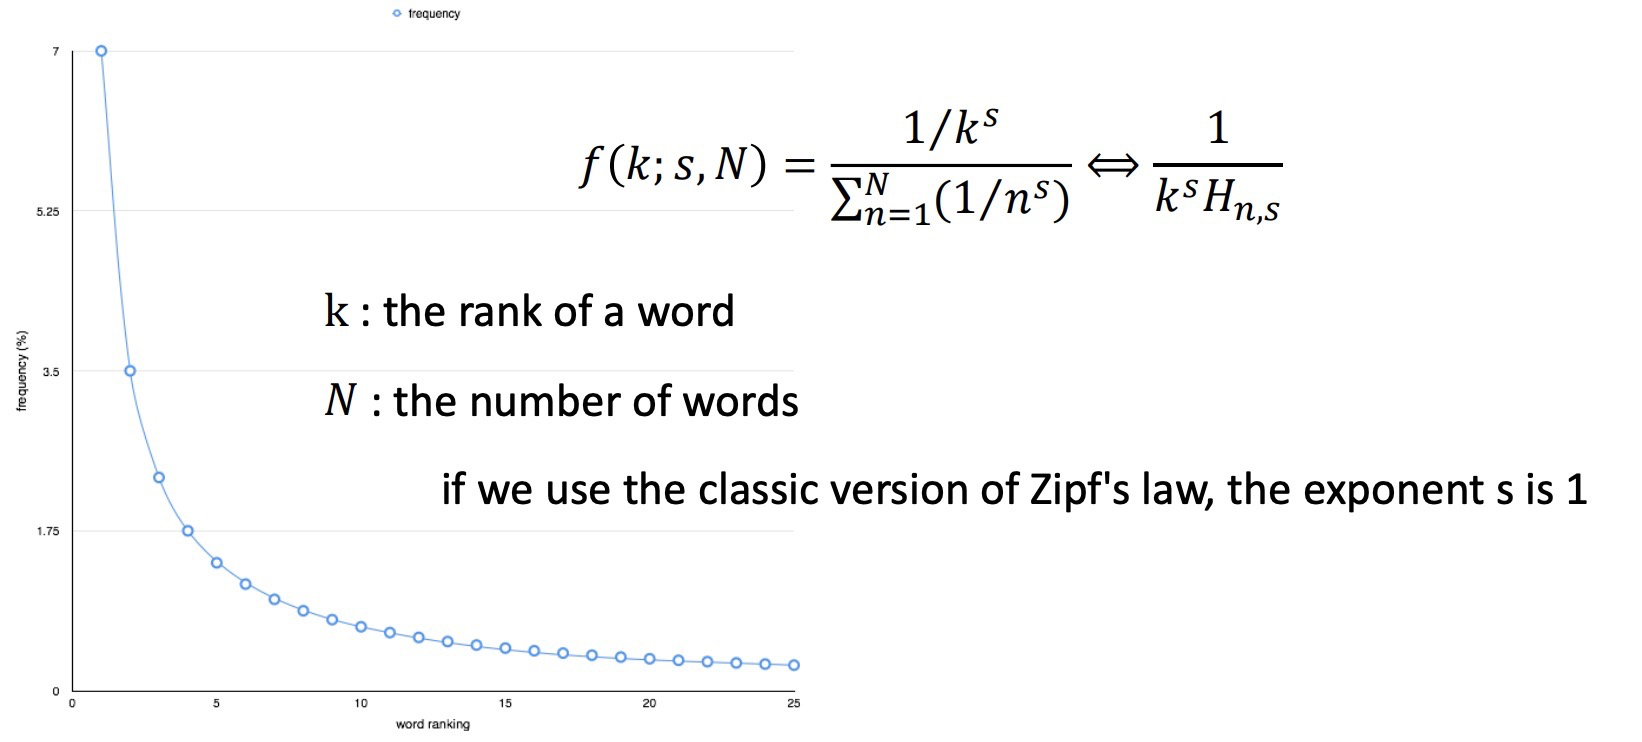

In [59]:
from matplotlib import font_manager, rc

path='/Library/Fonts/AppleGothic.ttf'

family = font_manager.FontProperties(fname=path).get_name()
rc('font' ,family=family)


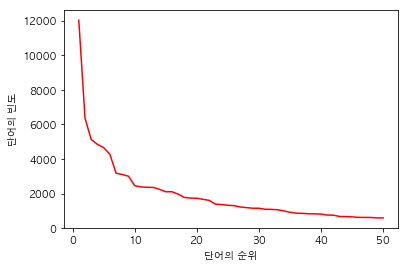

In [69]:
from nltk.corpus import gutenberg
from konlpy.corpus import kolaw
from nltk import Text
import matplotlib.pyplot as plt
import math

corpus = kolaw.open(kolaw.fileids()[0]).read()
corpus = gutenberg.open(gutenberg.fileids()[0]).read()
tokens = Text(word_tokenize(corpus))

x =  range(1,len(tokens.vocab().most_common(50))+1)
y = [token[1] for token in tokens.vocab().most_common(50)]
x,y

plt.plot(x,y,'r-',)
plt.xlabel('단어의 순위')
plt.ylabel('단어의 빈도')
plt.show()


# for k,v in
#     print(k,v)
#     break

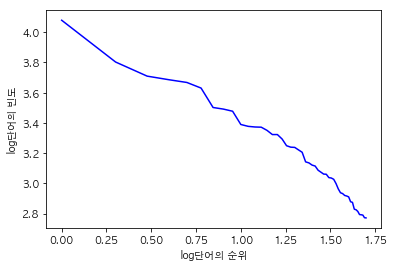

In [70]:
_x = [math.log10(_) for _ in x ]
_y = [math.log10(_) for _ in y ]



plt.plot(_x,_y,'b-',)
plt.xlabel('log단어의 순위')
plt.ylabel('log단어의 빈도')
plt.show()

### 우리가 수집한 기사

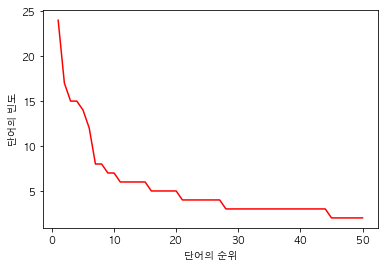

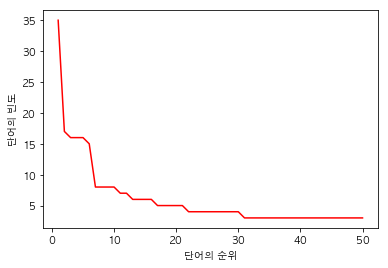

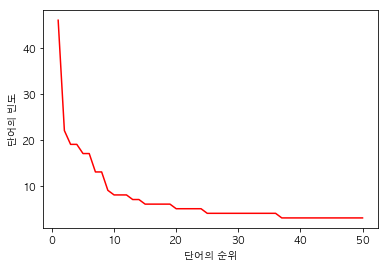

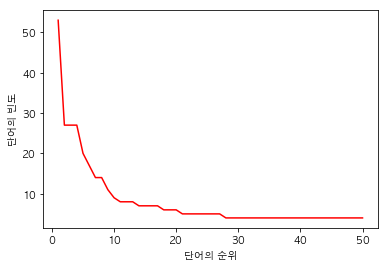

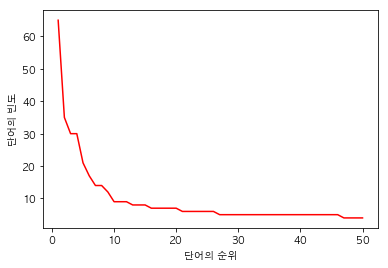

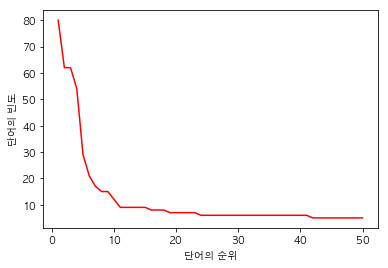

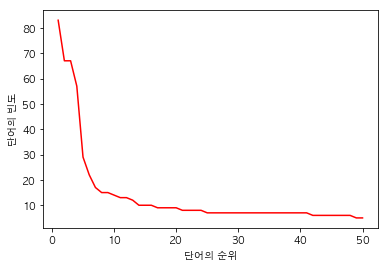

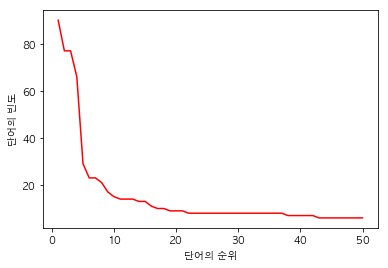

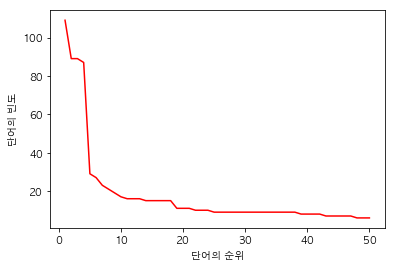

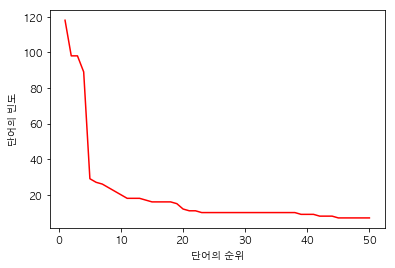

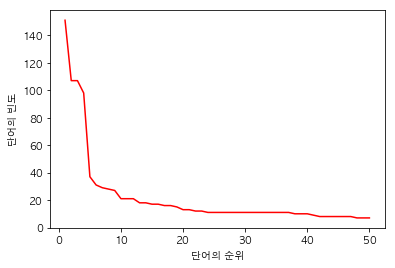

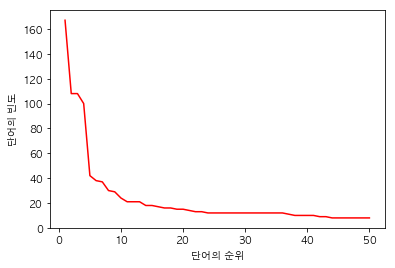

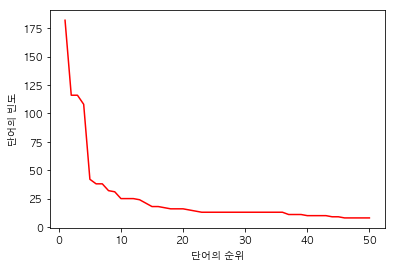

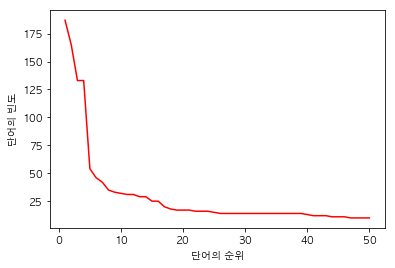

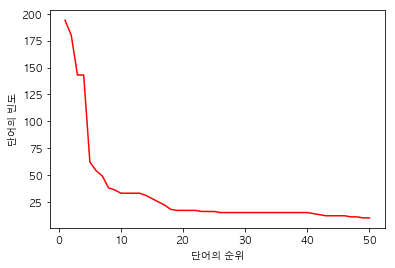

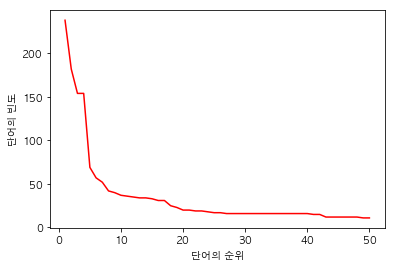

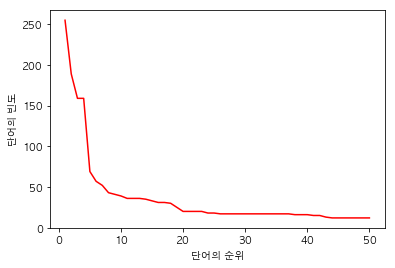

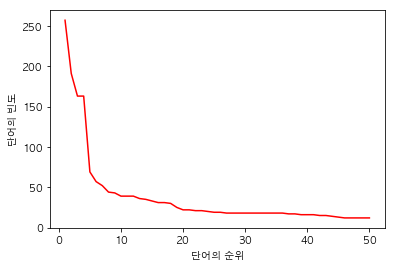

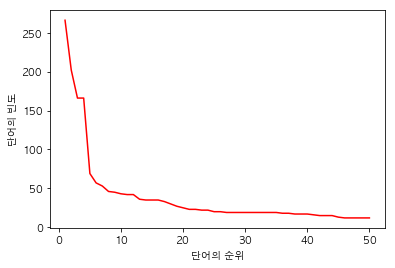

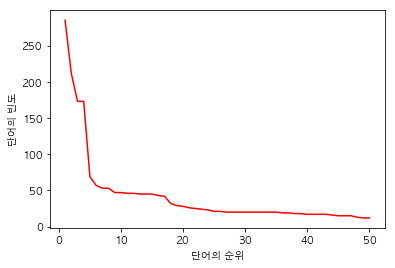

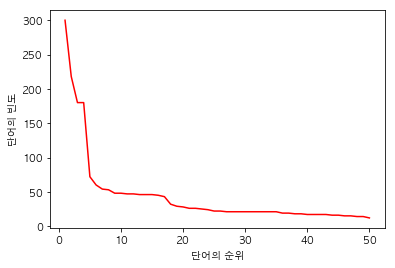

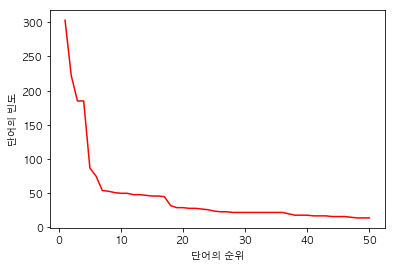

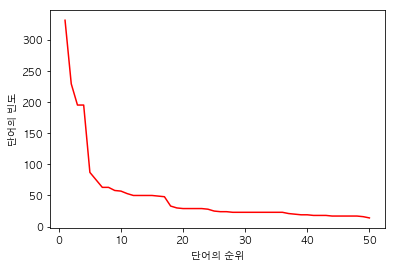

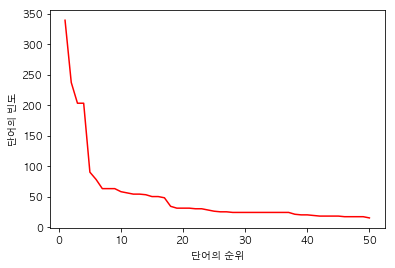

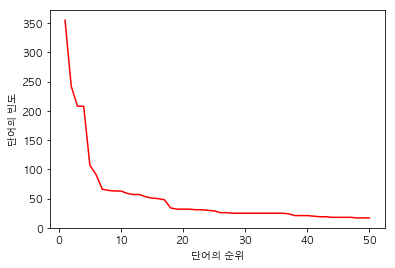

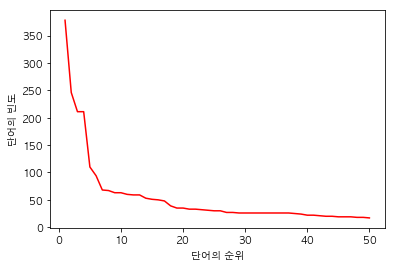

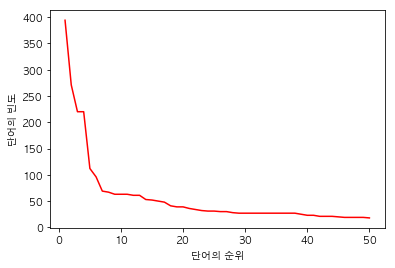

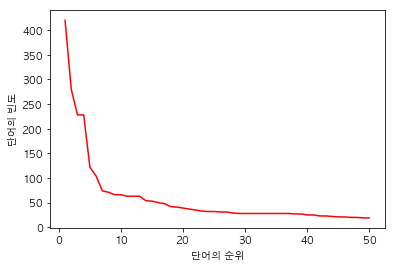

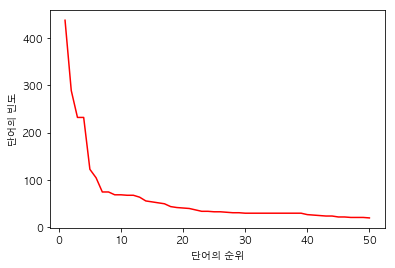

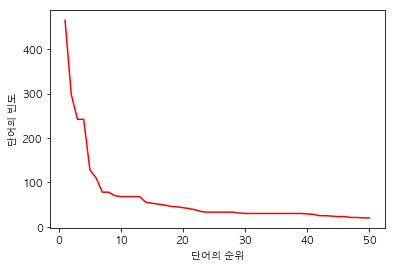

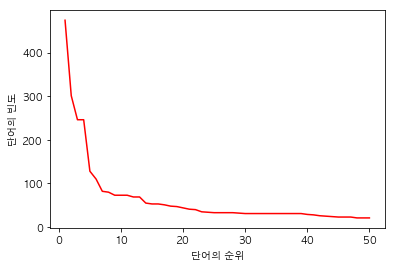

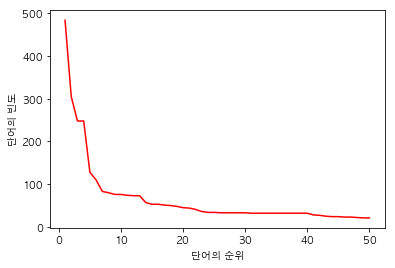

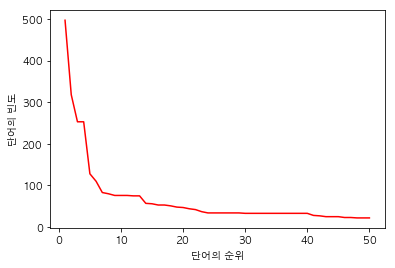

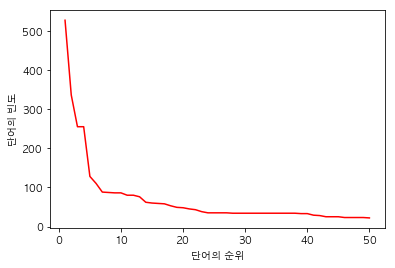

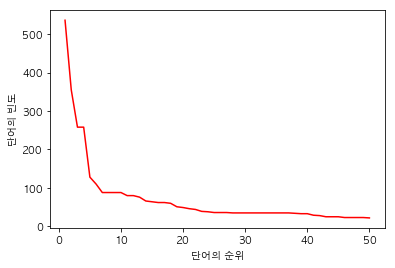

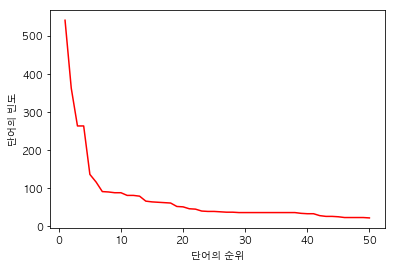

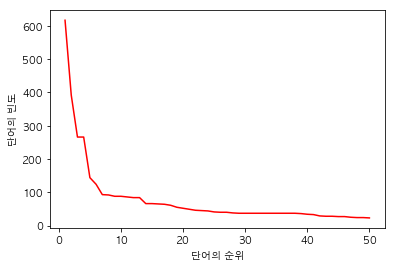

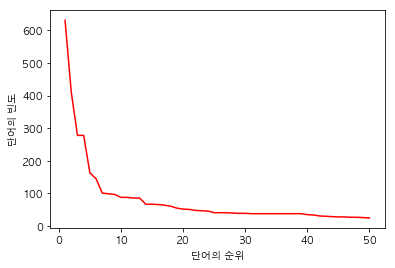

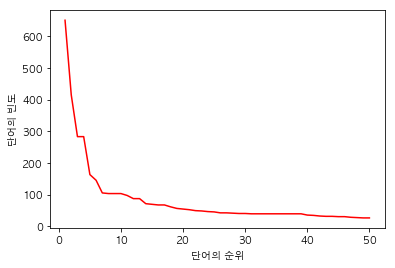

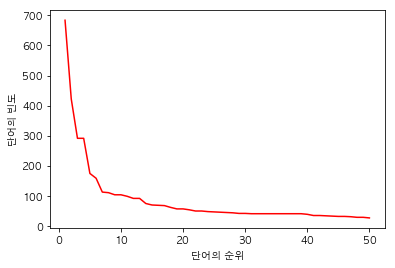

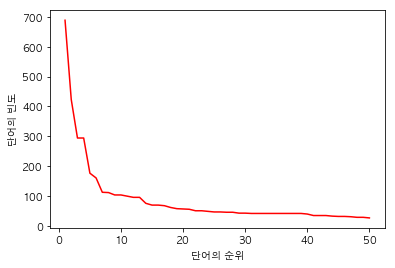

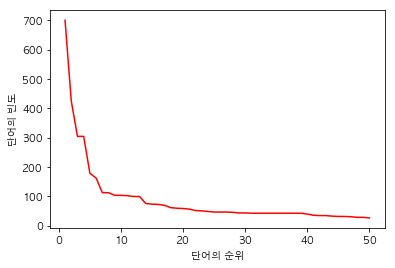

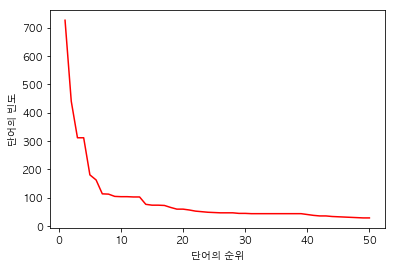

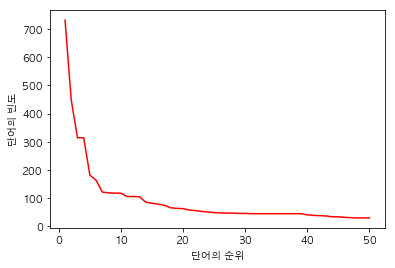

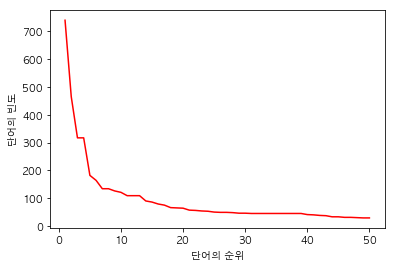

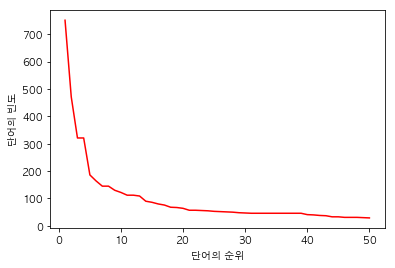

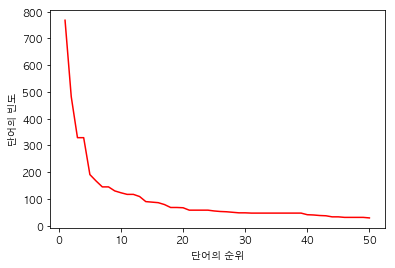

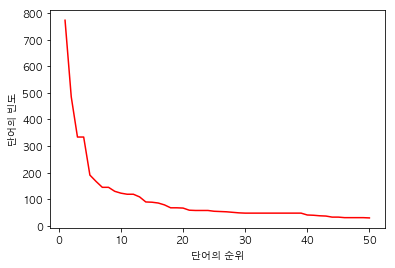

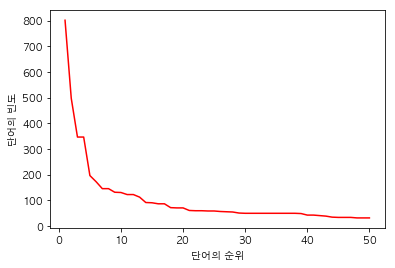

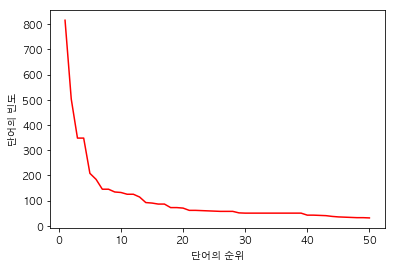

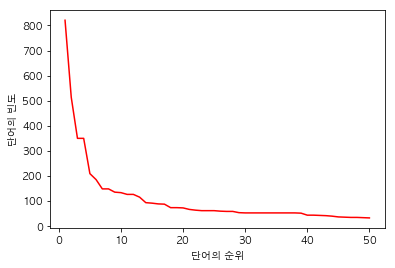

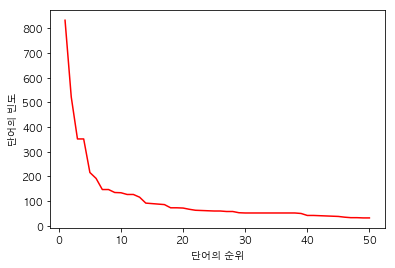

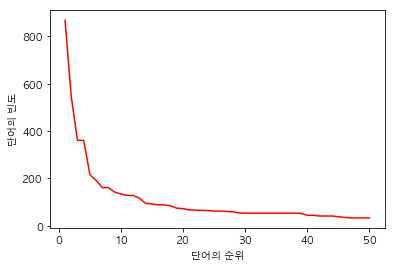

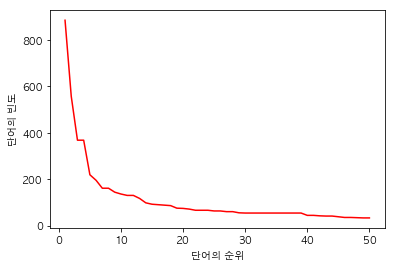

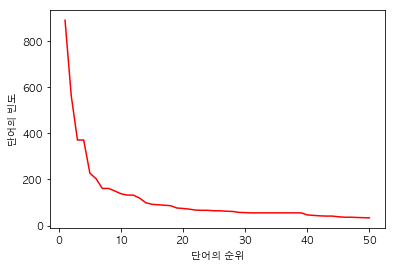

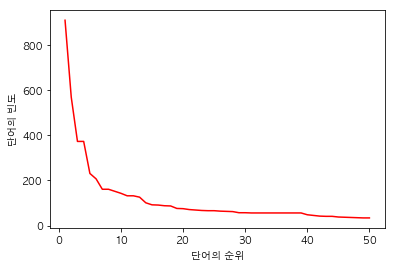

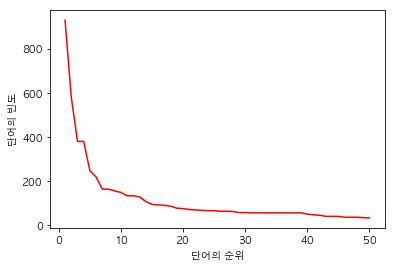

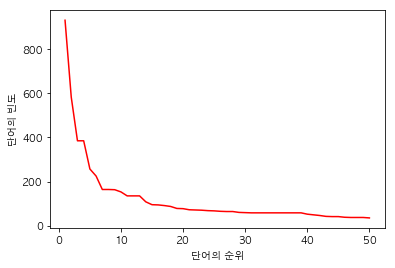

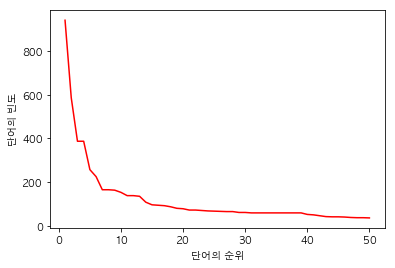

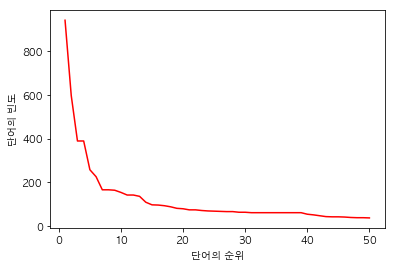

In [83]:
import os

path = './News'
corpora = []

for file in [_ for _ in os.listdir(path) if _.endswith('.txt')]:
    with open("{0}/{1}".format(path,file), encoding='utf-8') as fp:
        corpora.append(fp.read())
        # 여기까진 한 개만

txt = ""
# 여러 개 확인 
# 누적 시킴

for corpus in corpora:
    txt += corpus
    tokens = Text(word_tokenize(txt))
    x =  range(1,len(tokens.vocab().most_common(50))+1)
    y = [token[1] for token in tokens.vocab().most_common(50)]

    plt.plot(x,y,'r-',)
    plt.xlabel('단어의 순위')
    plt.ylabel('단어의 빈도')
    plt.show()
    
# 고빈도, 저빈도를 잘라서 중간대를 가지고 있어야 함! ( 경험에 의한 법칙 )

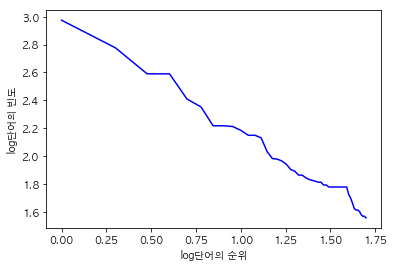

In [84]:
_x = [math.log10(_) for _ in x ]
_y = [math.log10(_) for _ in y ]



plt.plot(_x,_y,'b-',)
plt.xlabel('log단어의 순위') 
plt.ylabel('log단어의 빈도')
plt.show()

# 완벽한 선형은 아니지만 선형에 가까움 

### Heap's Law



12338


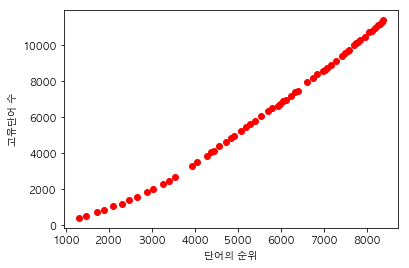

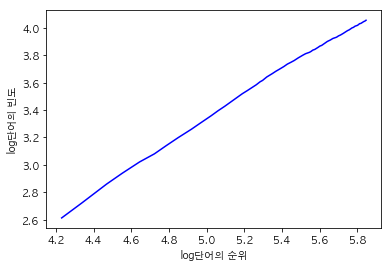

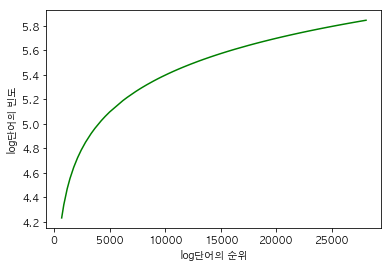

In [157]:
k = 50     # 10 - 100
b = 0.5    # 0.4 - 0.6

from konlpy.corpus import kobill
from math import log
# corpora=[]
# for file in kobill.fileids():
#        corpora.append(kobill.open(file).read())

#우리기사   
path = './News'
corpora = []

for file in [_ for _ in os.listdir(path) if _.endswith('.txt')]:
    with open("{0}/{1}".format(path,file), encoding='utf-8') as fp:
        corpora.append(fp.read())
#         여기까진 한 개만
        
        
        
# corpus = kolaw.open(kolaw.fileids()[0]).read()
# corpus = gutenberg.open(gutenberg.fileids()[0]).read()
x = []
y = []
_x = []
_y = []
_xx = []
_yy = []
txt=""

print(len(tokens))

for corpus in corpora:
    txt += corpus
    tokens = Text(word_tokenize(txt))
    x.append( k * len(tokens)**b)
    y.append(len(set(tokens)))  # 유니크한 토큰의 개수 
    
    # 전체적으로 log를 씌움 (지수는 내려옴 )
    _x.append(math.log10(k) + math.log10(len(tokens)*b))  # 지수여서 그냥 b로 내려옴 
    _y.append(math.log10(len(set(tokens))))
    
    _xx.append(len(tokens))
    _yy.append(math.log10(k) + math.log10(len(tokens)*b))
    
    
# x = len(set(tokens))  # 고유한 단어의 수
# y = k * len(tokens)**b

# x =  range(1,len(tokens.vocab().most_common(50))+1)
# y = [token[1] for token in tokens.vocab().most_common(50)]

# _x = [math.log10(_) for _ in x ]
# _y = [math.log10(_) for _ in y ]



plt.plot(x,y,'ro')
plt.xlabel('단어의 순위')
plt.ylabel('고유단어 수')
plt.show()

plt.plot(_x,_y,'b-',)
plt.xlabel('log단어의 순위') 
plt.ylabel('log단어의 빈도')
plt.show()

plt.plot(_xx,_yy,'g-',)
plt.xlabel('log단어의 순위') 
plt.ylabel('log단어의 빈도')
plt.show()




### Punctuation 

In [24]:
import re
from string import punctuation
from nltk.tokenize import word_tokenize

sentence = "I'd like to learn more something."

pattern = re.compile(r"[{0}]".format(re.escape(punctuation)))     # [ ] 여기 안에있는 글자 하나
# re.escape가 예외처리를 다 해줌 
pattern

re.compile(r'[!"\#\$%\&\'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~]',
re.UNICODE)

In [25]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
word_tokenize(sentence)

['I', "'d", 'like', 'to', 'learn', 'more', 'something', '.']

In [27]:
tokens = []
print(word_tokenize(sentence))

for term in word_tokenize(sentence):
#     re.sub(pattern,"",term)   원래는 이렇게 표현
     new =pattern.sub("",term)
     if new:
        tokens.append(new)


print(tokens)   # 구두점들 삭제

['I', "'d", 'like', 'to', 'learn', 'more', 'something', '.']
['I', 'd', 'like', 'to', 'learn', 'more', 'something']


In [28]:
sentence = "파이썬, 자연어처리, 그리고 어쩌고"

In [29]:
tokens = []
print(word_tokenize(sentence))

for term in word_tokenize(sentence):
#     re.sub(pattern,"",term)   원래는 이렇게 표현
     new =pattern.sub("",term)
     if new:
        tokens.append(new)


print(tokens)   # 구두점들 삭제

['파이썬', ',', '자연어처리', ',', '그리고', '어쩌고']
['파이썬', '자연어처리', '그리고', '어쩌고']


### Stopwords

In [135]:
# import nltk
# nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.fileids()

['arabic',
 'azerbaijani',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish',
 'turkish']

In [166]:
stop = stopwords.open("english").read()

In [167]:
sentence = "i love you"  # love가 중요한 단어   
sentence = "Beautiful is better than ugly."

print(sentence.split()) # 어절 단위 걸러냄 
print(word_tokenize(sentence)) # 점 걸러냄 

pattern = re.compile(r"[{0}]".format(re.escape(punctuation)))
sentence = pattern.sub("",sentence)   # 이러면 점까지 사라짐 

terms = word_tokenize(sentence)
cleanTerms = []
for term in terms:
    if term in stop:
        print("Skipped")
    else:
        print(term)
        cleanTerms.append(term)
        
print(cleanTerms)

# 원래 문장의 의미를 잃어버리지 않고, 뜻을 담고있는 단어들만 가져옴 
# 데이터에 따라서 stopwords나 기호를 없애야 한다. 

['Beautiful', 'is', 'better', 'than', 'ugly.']
['Beautiful', 'is', 'better', 'than', 'ugly', '.']
Beautiful
Skipped
better
Skipped
ugly
['Beautiful', 'better', 'ugly']


In [172]:
# i를 I(대문자)로 쓰면 못 걸러냄 
'i' in stop, 'I' in stop, "I".lower() in stop

(True, False, True)

In [163]:
# 한글 
sentence = "어머님 은 자장면 이, 싫다 고 하셨 어."
stop = ["은","는","이","가","을","를","께서","고","오"]

print(sentence.split()) # 어절 단위 걸러냄 
print(word_tokenize(sentence)) # 점 걸러냄 

# Normalization
# 1. 구두점 제거

pattern = re.compile(r"[{0}]".format(re.escape(punctuation)))
sentence = pattern.sub("",sentence)   # 이러면 점까지 사라짐 
print(sentence) # 점과 콤마 제거

# 2. Tokenize ( 공백과 구두점을 기반으로 토큰화 )
terms = word_tokenize(sentence)
cleanTerms = []

# 4. 불용어 제거 
for term in terms:
    if term not in stop:
        cleanTerms.append(term)
        
print(cleanTerms)

# 원래 문장의 의미를 잃어버리지 않고, 뜻을 담고있는 단어들만 가져옴 
# 데이터에 따라서 (금융데이터의 경우) stopwords나 기호를 없애야 한다. 
# 10개에서 5개로 절반이나 줄었다. 

['어머님', '은', '자장면', '이,', '싫다', '고', '하셨', '어.']
['어머님', '은', '자장면', '이', ',', '싫다', '고', '하셨', '어', '.']
어머님 은 자장면 이 싫다 고 하셨 어
['어머님', '자장면', '싫다', '하셨', '어']


In [181]:
# 영어 불용어 처리 
sentence = "I'd like to learn more something."

threshold = 2    

# 1.
# for token in sentence.split():
#     if len(token) > 2:
#         print(token)

# 2. 
for token in word_tokenize(sentence):
    if len(token) > 2:
        print(token)         # 구두점 제거. 
        
        
pattern = re.compile(r"\b\w{1,%d}\b" % threshold)
print(sentence)
print('아래처럼 바뀜')
print(pattern.sub(" ",sentence))    # 2개 아래 숫자 제거

like
learn
more
something
I'd like to learn more something.
아래처럼 바뀜
 '  like   learn more something.


In [191]:
# 영어 빈도 수 
sentence = "I'd like to learn more something. I'd like to learn more I."

threshold = 2    

# 1.
# for token in sentence.split():
#     if len(token) > 2:
#         print(token)

# 2. 
for token in word_tokenize(sentence):
    if len(token) > 2:
        print(token)         # 구두점 제거. 
        
        
pattern = re.compile(r"\b\w{1,%d}\b" % threshold)

# 빈도 2보다 작고 2보다 크면 출력
tokens = Text(word_tokenize(sentence))
for k in tokens.vocab():
    if tokens.count(k) > 2 or  tokens.count(k)  < 2:
        print(">>{0} / {1}".format(k, tokens.count(k)))
    else:
        print(">>"+k)
        
# print(sentence)
# print('아래처럼 바뀜')
# print(pattern.sub(" ",sentence))    # 2개 아래 숫자 제거

like
learn
more
something
like
learn
more
>>I / 3
>>'d
>>like
>>to
>>learn
>>more
>>something / 1
>>.


# 욕 필터링

욕설이 등장하는 것은 양해를...

In [201]:
def ngramUmjeol(term, n=2):
#     입력 : 단어1, 단어2, 단어3, 단어4 : 4
#     출력(2) : 단어12, 단어23, 단어34 : 3 - n + 1
#     출력(3) : 단어123, 단어234 : 2 - n + 1 
    ngram = []
    
    for i in range(len(term) - n + 1):
#          ngram.append(tuple(term[i:i+n]))
        ngram.append("".join(tuple(term[i:i+n])))   # 음절을 붙임
    return ngram

In [209]:
stop = ["시발","씨발"]

sentence = '씨발짜증나 시1발 씨발'    # 붙이면 토큰화가 안됨
result =[]

for term in sentence.split():
    if term in stop:
        result.append("*"*len(term))
    else:
        flag = False
        for token in ngramUmjeol(term):
            if token in stop:
                flag = True
        if flag:
            result.append("*"*len(term))
        else:    
            result.append(term)
        
" ".join(result)

'***** 시1발 **'

In [217]:
# 사이에 뭐가 들어가도 필터링하기 
stop = ["시발","씨발"]

sentence = '씨발짜증나 시1발 씨@발'    # 붙이면 토큰화가 안됨
result =[]
 
pattern = re.compile(r"\B[0-9]+\B")   # [0-9]로 숫자만 특정지을 수 있음 / 어절 안에 숫자가 있을 경우(B)
sentence = pattern.sub("",sentence)

for term in sentence.split():
    if term in stop:
        result.append("*"*len(term))
    else:
        flag = False
        for token in ngramUmjeol(term):
            if token in stop:
                flag = True
        if flag:
            result.append("*"*len(term))
        else:    
            result.append(term)
        
" ".join(result)


'***** ** 씨@발'

In [229]:
def findNgram(tokens,n=2):
    result = defaultdict(int)#{}
    
    for k,v in tokens.items():
        term = k.split()
        
        for i in range(len(term) - n + 1):
            ngram = (term[i], term[i+1])
            result[ngram] += v
            
#             if ngram in result.keys():
#                 result[ngram] += v
#             else:
#                 result[ngram] = v
                
    return result

from collections import defaultdict
def splitTerms(term):
#     t = term.replace(" ","_")   # 띄어쓰기 치환
    termList = term.split()
    result = []
    
    for t in term.split():
        result.append(" ".join(["<w>"]+list(t)+['</w>']))
        
    return " _ ".join(result)
#     print(len(term))

import re

def mergeNgram(maxkey,data):
    result = defaultdict(int)
    
    token = " ".join(maxkey)
    pattern = re.compile(r"(?!=\S)" + token + "(?!\S)" )    # ~로 시작하지 않는 / ~로 끝나지 않는 ( = "?<!")  화이트 스페이스가 아닌
   
    for k,v in data.items():
        new = pattern.sub("".join(maxkey),k)
        result[new] = v
        
    
    return result

In [269]:
# 지금 까지는 눈으로 보고 계속 확인했었다.
# 그런 것 말고 ngram model 이용해서 한 번에 제거할 것. 
data = {
    splitTerms("시발"):10,     # <w> 시 발 <w>
    splitTerms("시1발"):2,
    splitTerms("시1발"):2,
    splitTerms("시123발"):2
    
}

maxkey= None
maxval = 0

for i in range(2):
    pattern = findNgram(data)
    maxkey = max(pattern, key = pattern.get)
    data = mergeNgram(maxkey,data)
    print(maxkey)
    print(data)
    
# 발로 끝나는 패턴을 찾음 

# 시로 시작하는 패턴 + 발로 끝나는 패턴 찾음 
pattern = findNgram(data)
maxkey = max(pattern, key = pattern.get)

repattern = re.compile(maxkey[0]+".*" +maxkey[1])
repattern

('<w>', '시')
defaultdict(<class 'int'>, {'<w>시 발 </w>': 10, '<w>시 1 발 </w>': 2, '<w>시 1 2 3 발 </w>': 2})
('발', '</w>')
defaultdict(<class 'int'>, {'<w>시 발</w>': 10, '<w>시 1 발</w>': 2, '<w>시 1 2 3 발</w>': 2})


re.compile(r'<w>시.*발</w>', re.UNICODE)

In [270]:
sentence = '시발 시1발 시@발'

result = []
for token in  sentence.split():
    if repattern.search("<w>{0}</w>".format(token)):
        result.append("*"*len(token))
    else:
        result.append(token)
        
"".join(result)

'********'